In [1]:
%run ../setup_notebook.ipynb

In [2]:
# notebook specific imports
from utils import cacher
import pickle
from termcolor import cprint
from subsets_analysis import Subsets

In [3]:
pkl_path = os.path.join(path_to_vape, 'run_pkls')
if not os.path.exists(pkl_path):
    os.mkdir(pkl_path)

In [4]:
pkl_path

'/home/clean_python/code/Vape/run_pkls'



Run Number 16

/home/jrowland/mnt/qnap/Data/2019-12-19
['/home/jrowland/mnt/qnap/Data/2019-12-19/blimp/2019-12-19-153133']
['/home/jrowland/mnt/qnap/Data/2019-12-19/naparm/2019-12-19_NAPARM_J065_006']
['/home/jrowland/mnt/qnap/Data/2019-12-19/J065-2019-12-19-153716.txt', '/home/jrowland/mnt/qnap/Data/2019-12-19/2019-12-19_J065_t004.paq', '/home/jrowland/mnt/qnap/Data/2019-12-19/J065-2019-12-19-152547.txt']
['/home/jrowland/mnt/qnap/Data/2019-12-19/2019-12-19_J065_t-004']
['/home/jrowland/mnt/qnap/Data/2019-12-19/2019-12-19_J065_t-005']
['/home/jrowland/mnt/qnap/Data/2019-12-19/2019-12-19_J065_t-006']
['/home/jrowland/mnt/qnap/Data/2019-12-19/2019-12-19_J065_t-007']
['/home/jrowland/mnt/qnap/Data/2019-12-19/2019-12-19_J065_t-008']
Importing data file: J065-2019-12-19-153716.txt
pycontrol J065-2019-12-19-153716 successfully matched to blimp folder 2019-12-19-153133
pycontrol J065-2019-12-19-152547.txt rsync successfully matched to paq 2019-12-19_J065_t004.paq
Importing data file: J065-

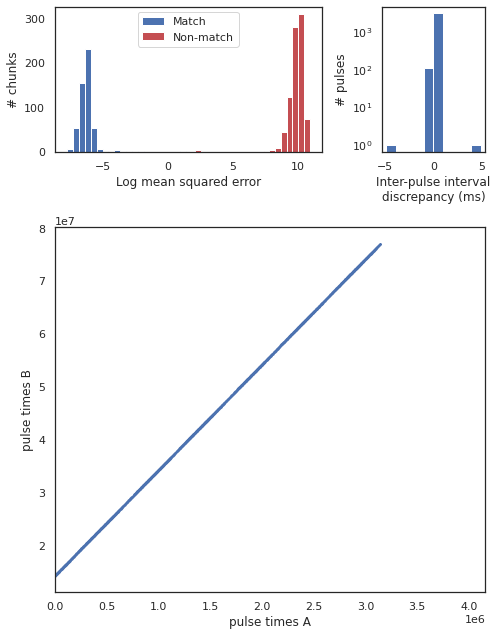

In [9]:
mouse_id = 'J065'
# 10 looks bad and deconv failed
# have switched off spks deconv to see if any of these sessions are usable
run_numbers = [11,12,13,14,15]
run_numbers = [16]

for run_number in run_numbers:
    
    cprint('\n\nRun Number {}\n'.format(run_number), attrs=['bold'])
    
    cacher.main(mouse_id, run_number, pkl_path,   
                reprocess=True, reload=True, do_s2p=False, do_flu_preprocess=False)



Run Number 9

/home/jrowland/mnt/qnap/Data/2019-12-12
['/home/jrowland/mnt/qnap/Data/2019-12-12/blimp/2019-12-12-204422']
['/home/jrowland/mnt/qnap/Data/2019-12-12/naparm/2019-12-12_J064_naparm_002']
['/home/jrowland/mnt/qnap/Data/2019-12-12/J064-2019-12-12-205514.txt', '/home/jrowland/mnt/qnap/Data/2019-12-12/2019-12-12_J064_t002.paq', '/home/jrowland/mnt/qnap/Data/2019-12-12/J064-2019-12-12-203106.txt']
['/home/jrowland/mnt/qnap/Data/2019-12-12/2019-12-12_J064_t-002']
['/home/jrowland/mnt/qnap/Data/2019-12-12/2019-12-12_J064_t-003']
['/home/jrowland/mnt/qnap/Data/2019-12-12/2019-12-12_J064_t-004']
['/home/jrowland/mnt/qnap/Data/2019-12-12/2019-12-12_J064_t-005']
['/home/jrowland/mnt/qnap/Data/2019-12-12/2019-12-12_J064_t-006']
['/home/jrowland/mnt/qnap/Data/2019-12-12/2019-12-12_J064_t-007']
['/home/jrowland/mnt/qnap/Data/2019-12-12/2019-12-12_J064_t-008']
['/home/jrowland/mnt/qnap/Data/2019-12-12/2019-12-12_J064_t-009']
Importing data file: J064-2019-12-12-205514.txt
pycontrol J06

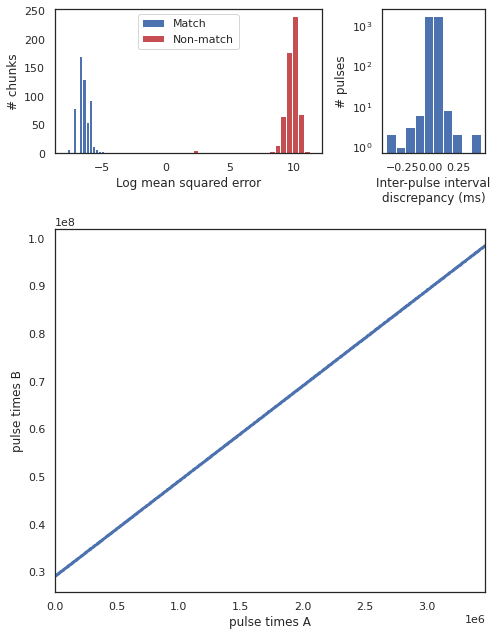

In [51]:
mouse_id = 'J064'
run_numbers = [12,13,14,15]
run_numbers = [14,15]
run_numbers = [9]

for run_number in run_numbers:
    cprint('\n\nRun Number {}\n'.format(run_number), attrs=['bold'])
    
    cacher.main(mouse_id, run_number, pkl_path,   
                reprocess=True, reload=True, do_s2p=False, do_flu_preprocess=False)

In [ ]:
mouse_id = 'J063'
run_numbers = [8,9,10,11,12,13,14]
# Spiral alignment didnt work for run10
#run_numbers = [10,11,12,13,14]
run_numbers = [11,12,13,14]
for run_number in run_numbers:
    
    cprint('\n\nRun Number {}\n'.format(run_number), attrs=['bold'])
    
    cacher.main(mouse_id, run_number, pkl_path,   
                reprocess=True, reload=True, do_s2p=True, do_flu_preprocess=False)
 
    if run_number == 10:
        # manual fix as I stopped and started the behaviour so the blimp alignment txt has
        # two trials at the start that are not recorded in the main pycontrol txt
        # so load pickle back in, patch and then save
        pkl_file = os.path.join(pkl_path, mouse_id, 'run{}.pkl'.format(run_number))

        with open(pkl_file, 'rb') as f:
            run = pickle.load(f)

        if run.align_barcode != run.alltrials_barcodes:

            run.align_barcode = run.align_barcode[2:]
            run.trial_info = run.trial_info[2:]
            assert run.align_barcode == run.alltrials_barcodes

            with open(pkl_file, 'wb') as f:
                pickle.dump(run, f)
        else:
            print('Manual Correction already applied')

### Quickly eyeball the behaviour so you don't have to suite2p bad behaviour. 
### Requires cacher.main to have been run. But you can set do_s2p = False

In [7]:
def load_run(mouse, run_number, pkl_path):
    run_path = os.path.join(pkl_path, mouse, f'run{run_number}.pkl')
    with open(run_path, 'rb') as f:
        run = pickle.load(f)
    return run

In [10]:
run_number = 16
mouse = 'J065'

pkl_path = '/home/jrowland/mnt/qnap/run_pkls'
run = load_run(mouse, run_number, pkl_path)

In [11]:
def get_subset_dprime(run):
    
    trial_subsets = Subsets(run).trial_subsets
    assert trial_subsets.shape == run.outcome.shape
    
    fp_rate = sum(run.outcome=='fp') / (sum(run.outcome=='fp') + sum(run.outcome=='cr'))
    subset_dprimes = []
    for subset in [[5],[10],[20],[30],[40],[50], [150]]:
        idx = np.isin(trial_subsets, subset)
        outcome = run.outcome[idx]
        hit_rate = sum(outcome=='hit') / (sum(outcome=='hit') + sum(outcome=='miss'))
        subset_dprimes.append(utils.d_prime(hit_rate, fp_rate)) 
    return subset_dprimes

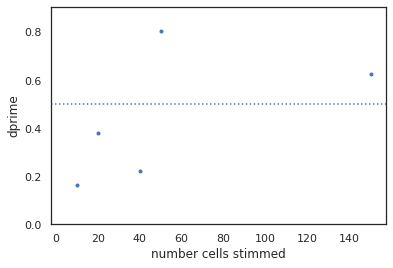

In [12]:
subset_dprimes = get_subset_dprime(run)
plt.plot([5,10,20,30,40,50,150], subset_dprimes, '.')
plt.xlabel("number cells stimmed")
plt.ylabel('dprime')
plt.ylim(0, max(subset_dprimes)+0.1)

plt.axhline(0.5, linestyle=':')
plt.axhline(1, linestyle=':')


In [95]:
run.__dict__.keys()

dict_keys(['mouse_id', 'df', 'rows_2p', 'rows_1p', 'dates_2p', 'paqs', 'naparm_folders', 'blimp_folders', 'pycontrol_folders', 'prereward_folders', 'tseries_folders', 'plane_numbers', 'reloaded', 'run_pycontrol_txt', 'num_planes', 'blimp_path', 'naparm_path', 'pycontrol_path', 'paq_path', 'prereward_path', 'tseries_paths', 'align_barcode', 'trial_info', 'session', 'print_lines', 'trial_time', 'outcome', 'slm_barcode', 'slm_trial_number', 'nogo_barcode', 'nogo_trial_number', 'alltrials_barcodes', 'rsync', 'trial_start', 'paq_rsync', 'frame_clock', 'x_galvo_uncaging', 'slm2packio', 'paq_rate', 'aligner', 'paq_correct', 'pre_rsync', 'pre_licks', 'pre_reward', 'prereward_aligner', 'both_aligner', 'num_frames', 's2p_path', 'spiral_start', 'spiral_licks', 'autorewarded_trial', 'toosoon_idx', 'false_miss'])